In [ ]:
import numpy as np
X_ = np.array( [1.1,2.2,3.3]) #,[1,2,3],[1,2,3],[5,3,1],[3,2,2]] )

#ad = np.max( X , axis=0)
#res = X / np.array([10,3,6])
#res , ad , X.T
df = lambda x: 4 * x**3 - 9 * x ** 2
#df(6)
X=0
X_[1:2][0]

X_[0]

1.1

In [ ]:
t_=np.ones(9)*0.1
t_

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [ ]:
x = 6  # Starting point
step_size = 0.01
step_tolerance = 0.00001
max_iterations = 10000

# Derivative function f'(x)
df = lambda x: 4 * x**3 - 9 * x ** 2

# Gradient descent iteration
for j in range(max_iterations):
    print(step , '\t' , x) 
    step = step_size * df(x)
    x -= step
    print( abs(step) )
    if abs(step) <= step_tolerance:
        break


In [2]:
path_ = ""

In [3]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

with open( path_ + 'data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


In [ ]:
#import math
#np.exp( 2) , math.exp(2)

In [ ]:
# incorrect function
def forward_func_for_gradient( x , w):
        # incorrect function

        q1 = w[0] * x[0:1][0]
        q2 = w[1] * x[1:2][0]
        q3 = q1 + q2
        q4 = q2 + q1
        q5 = q3 * q4
        q6 = q5 + w[5]
        q7 = np.exp( q6 ) 
        exp_value  = q7

        q8 = q7 + w[6]
        q9 = np.tanh( q8 )
        tanh_value = q9

        q10 = w[2] * x[2:3][0]
        q11=w[3] * x[3:4][0]
        q12=w[4]*x[4:5][0]
        q13=np.sin(q10)
        sin_value = q13
        
        q14=q11+q12
        q15=q13*q14
        q16=q15 + w[7]
        q17 = sigmoid( q16 )

        sigmoid_val = q17   #q17

        q18=q17 * w[8]
        q19=q18 + q9
        
        y_pred = q19
        return y_pred

In [48]:

def forward_func_for_gradient_1(X_ , y, w):
        dl = None
        loss = None
        exp_value = None
        tanh_value = None
        sigmoid_val = None
        all_points = None
        y_pred = 0
        #print( len( X_ ) )
        # for only single point
        if len( X_ ) == 5 and len( [X_[0]] ) == 1 and isinstance(X_[0] , (int,float,complex)):
          all_points = np.array( [ X_ ] )
          y = [y]
        else :
          all_points = np.array( X_ )
        
        #
        #print( all_points )
        for i , x in enumerate(all_points):

            #x = np.array( x )
            #print( x )
            q1 = w[0] * x[0:1][0]
            q2 = w[1] * x[1:2][0]
            q3 = q1 + q2
            q4 = q2 + q1
            q5 = q3 * q4
            q6 = q5 + w[5]
            q7 = np.exp( q6 ) 
            exp_value  = q7

            q8 = q7 + w[6]
            q9 = np.tanh( q8 )
            tanh_value = q9

            q10 = w[2] * x[2:3][0]
            q11=w[3] * x[3:4][0]
            q12=w[4]*x[4:5][0]
            q13=np.sin(q10)
            sin_value = q13
            
            q14=q11+q12
            q15=q13*q14
            q16=q15 + w[7]
            q17 = sigmoid( q16 )

            sigmoid_val = q17   #q17

            q18=q17 * w[8]
            q19=q18 + q9
            
            y_pred = q19
            #print( y_pred )
            loss =  (y[i] - y_pred)**2
            dl = -2 * 1 * (y[i] - y_pred ) # derivative loss

        dictionary = {}
        dictionary['dl']= dl
        dictionary['loss']= loss
        dictionary['exp']= exp_value
        dictionary['tanh']= tanh_value
        dictionary['sigmoid']= sigmoid_val

        dictionary['q3']= q3
        dictionary['q4']= q4
        dictionary['q6']= q6
        dictionary['q8']= q8

        dictionary['q16']= q16
        dictionary['q14']= q14
        dictionary['q10']= q10

        dictionary['w9']= w[8]
        
        return loss


In [53]:

def gradient_checking(data_point, y , W , dwi ):
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()
    approx_gradients = []
    gradient_check_list = []
    epsilon = 0.00001

    '''
    W_plus_e = W
    W_minus_e = W
    W_plus_e[i] =  W_plus_e[i] + epsilon
    W_minus_e[i] =  W_minus_e[i] - epsilon
    dw_i_approx = ( forward_function( X[0] , y[0] , W_plus_e ) - forward_function( X[0] , y[0] , W_minus_e ) ) / (2 * epsilon)'''

    for i , each_dwi in enumerate(W):
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi
        #approx_gradients.append(approximation gradients of weight wi)
        
        W_plus_e = np.array( W )
        W_minus_e = np.array( W )
        #print( each_dwi )
        W_plus_e[i] = ( W_plus_e[i] + epsilon )
        W_minus_e[i] = ( W_minus_e[i] - epsilon )
        #print( W )
        #print( W_plus_e )
        #print( W_minus_e )
        #(y[i] - y_pred)**2
        
        loss_plus = forward_func_for_gradient_1( data_point , y , W_plus_e )
        loss_minus = forward_func_for_gradient_1( data_point , y , W_minus_e )
        #print( ( y[0] - yp_1 )**2  )
        #print( ( y[0] - yp_2 )**2  )
        dw_i_approx = (  ( loss_plus )   -  ( loss_minus )  ) / ( 2 * epsilon )
        #approx_gradients.append( dw_i_approx )
        #print( dw_i_approx )
        gradient_check = ( np.sqrt( np.square( dwi[i] - dw_i_approx ))  ) / ( np.sqrt( np.square( dwi[i] )) + 
                                                                            np.sqrt( np.square( dw_i_approx )))
        print(dwi[i] ,"==" , dw_i_approx  )
        #gradient_check = (  ( dwi[i] - dw_i_approx ))   / (  ( dwi[i] ) +  ( dw_i_approx )  )
        
        gradient_check_list.append( gradient_check )
        #gradient_check_1 =  ( each_dwi - dw_i_approx ) / ( each_dwi + dw_i_approx ) 
        #print( gradient_check )
        #print( gradient_check_1 )

    # compare the gradient of weights W from backword_propagation() 
    #with the aproximation gradients of weights with gradient_check formula
    return gradient_check_list

W = np.ones(9)*0.1
d2=forward_propagation(X[0] , y[0] , W )
dw_back=backward_propagation(X[0] , W , d2 )
#d2 , dw_back
dw_arr = np.zeros(9)
dw_arr[0] = dw_back['dw1']
dw_arr[1] = dw_back['dw2']
dw_arr[2] = dw_back['dw3']
dw_arr[3] = dw_back['dw4']
dw_arr[4] = dw_back['dw5']
dw_arr[5] = dw_back['dw6']
dw_arr[6] = dw_back['dw7']
dw_arr[7] = dw_back['dw8']
dw_arr[8] = dw_back['dw9']
#print(dw_arr)
#print(W)
gradient_checks = gradient_checking(X[0] ,y[0] , W , dw_arr )
print("-"*50)
#chack = ( dw_arr - np.array( dw_aprx ) ) / ( dw_arr + np.array( dw_aprx ) )
#chack
gradient_checks

-0.22973323498702 == -0.2297332349465719
-0.02140761471775293 == -0.0214076147198039
-0.005625405580266319 == -0.0056254055746940415
-0.004657941222712423 == -0.004657941221619666
-0.0010077228498574246 == -0.0010077228440596997
-0.6334751873437471 == -0.6334751873338096
-0.561941842854033 == -0.5619418428914891
-0.04806288407316516 == -0.04806288406711267
-1.0181044360187037 == -1.0181044360180191
--------------------------------------------------


[8.803273354897832e-11,
 4.790282643545067e-11,
 4.952778786722596e-10,
 1.173004240700925e-10,
 2.876646564009127e-09,
 7.843634186261195e-12,
 3.332732625809271e-11,
 6.296430143698834e-11,
 3.361951351774315e-13]

In [ ]:
dw_arr , np.array( dw_aprx )

(array([-2.29733235e-01, -2.14076147e-02, -5.62540558e-03, -4.65794122e-03,
        -1.00772285e-03, -6.33475187e-01, -5.61941843e-01, -4.80628841e-02,
        -1.01810444e+00]),
 array([-4.45863959e-01, -4.15476833e-02,  1.20629394e-03,  1.39173599e-03,
         3.01095289e-04,  5.79993302e-01,  9.99667207e-01, -2.54379337e-01,
         4.87993257e-01]))

In [6]:
#test grader_forwardprop
def grader_forwardprop(data):
    dl = (np.round(data['dl'],4)==-1.9285)
    loss=(np.round(data['loss'],4)==0.9298)
    part1=(np.round(data['exp'],4)==1.1273)
    part2=(np.round(data['tanh'],4)==0.8418)
    part3=(np.round(data['sigmoid'],4)==0.5279)
    assert(dl and loss and part1 and part2 and part3)
    return True
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
grader_forwardprop(d1)

True

In [7]:
#test grader_backprop
def grader_backprop(data):
    dw1=(np.round(data['dw1'],4)==-0.2297)
    dw2=(np.round(data['dw2'],4)==-0.0214)
    dw3=(np.round(data['dw3'],4)==-0.0056)
    dw4=(np.round(data['dw4'],4)==-0.0047)
    dw5=(np.round(data['dw5'],4)==-0.001)
    dw6=(np.round(data['dw6'],4)==-0.6335)
    dw7=(np.round(data['dw7'],4)==-0.5619)
    dw8=(np.round(data['dw8'],4)==-0.0481)
    dw9=(np.round(data['dw9'],4)==-1.0181)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True 
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
d1=backward_propagation(X[0],w,d1)
grader_backprop(d1)

True

In [4]:
def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    # we can use this function in forward and backward propagation
     
    return (1 / (1 + np.exp(-z))) 
    
def forward_propagation(X_ , y, w):
        '''In this function, we will compute the forward propagation '''
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph,..., W[8] corresponds to w9 in graph.  
        # you have to return the following variables
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        # now compute remaining values from computional graph and get y'
        # write code to compute the value of L=(y-y')^2
        # compute derivative of L  w.r.to Y' and store it in dl
        # Create a dictionary to store all the intermediate values
        # store L, exp,tanh,sig variables

        dl = None
        loss = None
        exp_value = None
        tanh_value = None
        sigmoid_val = None
        all_points = None

        #print( len( X_ ) )
        # for only single point
        if len( X_ ) == 5 and len( [X_[0]] ) == 1 and isinstance(X_[0] , (int,float,complex)):
          all_points = np.array( [ X_ ] )
          y = [y]
        else :
          all_points = np.array( X_ )
        
        #
        #print( all_points )
        for i , x in enumerate(all_points):

            #x = np.array( x )
            #print( x )
            q1 = w[0] * x[0:1][0]
            q2 = w[1] * x[1:2][0]
            q3 = q1 + q2
            q4 = q2 + q1
            q5 = q3 * q4
            q6 = q5 + w[5]
            q7 = np.exp( q6 ) 
            exp_value  = q7

            q8 = q7 + w[6]
            q9 = np.tanh( q8 )
            tanh_value = q9

            q10 = w[2] * x[2:3][0]
            q11=w[3] * x[3:4][0]
            q12=w[4]*x[4:5][0]
            q13=np.sin(q10)
            sin_value = q13
            
            q14=q11+q12
            q15=q13*q14
            q16=q15 + w[7]
            q17 = sigmoid( q16 )

            sigmoid_val = q17   #q17

            q18=q17 * w[8]
            q19=q18 + q9
            
            y_pred = q19
            #print( y_pred )
            loss =  (y[i] - y_pred)**2
            dl = -2 * 1 * (y[i] - y_pred ) # derivative loss

        dictionary = {}
        dictionary['dl']= dl
        dictionary['loss']= loss
        dictionary['exp']= exp_value
        dictionary['tanh']= tanh_value
        dictionary['sigmoid']= sigmoid_val

        dictionary['q3']= q3
        dictionary['q4']= q4
        dictionary['q6']= q6
        dictionary['q8']= q8

        dictionary['q16']= q16
        dictionary['q14']= q14
        dictionary['q10']= q10

        dictionary['w9']= w[8]
        
        return dictionary


In [5]:
def backward_propagation(X , W,dict_):
    '''In this function, we will compute the backward propagation '''
    # L: the loss we calculated for the current point
    # dictionary: the outputs of the forward_propagation() function
    # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
    # Hint: you can use dict type to store the required variables 
    # dw1 = # in dw1 compute derivative of L w.r.to w1
    # dw2 = # in dw2 compute derivative of L w.r.to w2
    # dw3 = # in dw3 compute derivative of L w.r.to w3
    # dw4 = # in dw4 compute derivative of L w.r.to w4
    # dw5 = # in dw5 compute derivative of L w.r.to w5
    # dw6 = # in dw6 compute derivative of L w.r.to w6
    # dw7 = # in dw7 compute derivative of L w.r.to w7
    # dw8 = # in dw8 compute derivative of L w.r.to w8
    # dw9 = # in dw9 compute derivative of L w.r.to w9

    dw = {}

    q8 = dict_['q8']
    q6 = dict_['q6']
    q4 = dict_['q4']
    q3 = dict_['q3']
    q16 = dict_['q16']
    q14 = dict_['q14']
    q10 = dict_['q10']

    w9 = dict_['w9']

    #print( X )
    #print( X[0] )
    #print(len( X ))
    #print(len( [X[0]] ))
    # for only single point
    if len( X ) == 5 and len( [X[0]] ) == 1 and isinstance(X[0] , (int,float,complex)):
      all_points = np.array( [ X ] )
    else :
      all_points = np.array( X )
    
    #
    #print( all_points )
    for i , point in enumerate(all_points):
      f1 = point[0:1][0]
      f2 = point[1:2][0]
      f3 = point[2:3][0]
      f4 = point[3:4][0]
      f5 = point[4:5][0]

      dw1 = ( 1 - np.square(np.tanh( q8 )) ) * ( np.exp( q6 ) ) * q4 * f1 * dict_['dl'] *2
      dw2 = ( 1 - np.square(np.tanh( q8 )) ) * ( np.exp( q6 ) ) * q3 * f2 * dict_['dl'] *2
      dw6 = ( 1 - np.square(np.tanh( q8 )) ) * ( np.exp( q6 ) ) * dict_['dl']
      dw7 = ( 1 - np.square(np.tanh( q8 )) ) * dict_['dl']
      dw9 = dict_['dl'] * sigmoid( q16 )
      dw8 = dict_['dl'] * w9 * sigmoid( q16 ) * (1 - sigmoid( q16 ) )
      dw3 = dw8 * np.cos( q10 ) * q14 * f3
      dw4 = dw8 * np.sin( q10 ) * f4
      dw5 = dw8 * np.sin( q10 ) * f5

    dw['dw1'] = dw1
    dw['dw6'] = dw6
    dw['dw7'] = dw7
    dw['dw2'] = dw2
    dw['dw3'] = dw3
    dw['dw4'] = dw4
    dw['dw5'] = dw5
    dw['dw8'] = dw8
    dw['dw9'] = dw9

    #return dW, dW is a dictionary with gradients of all the weights
    return dw


In [ ]:
w=np.ones(9)*0.1
d1=forward_propagation(X,y,w)
d1  

{'dl': -1.4220633163091767,
 'exp': 1.1085248541463766,
 'loss': 0.5055660188980634,
 'sigmoid': 0.5230906286440833,
 'tanh': 0.836236446870364}

In [ ]:
w=np.ones(9)*0.1
d2=forward_propagation(X[0],y[0],w)
dback=backward_propagation(X[0], w,d2)
d2 , dback

({'dl': -1.9285278284819143,
  'exp': 1.1272967040973583,
  'loss': 0.9298048963072919,
  'q10': -0.14590003802772022,
  'q14': -0.08108256415764016,
  'q16': 0.11178802350675654,
  'q3': -0.1407922915155795,
  'q4': -0.1407922915155795,
  'q6': 0.11982246935020793,
  'q8': 1.2272967040973584,
  'sigmoid': 0.5279179387419721,
  'tanh': 0.8417934192562146,
  'w9': 0.1},
 {'dw1': -0.22973323498702,
  'dw2': -0.02140761471775293,
  'dw3': -0.005625405580266319,
  'dw4': -0.004657941222712423,
  'dw5': -0.0010077228498574246,
  'dw6': -0.6334751873437471,
  'dw7': -0.561941842854033,
  'dw8': -0.04806288407316516,
  'dw9': -1.0181044360187037})

In [ ]:
w=np.ones(9)*0.1
d2=forward_propagation(X , y , w )
dback=backward_propagation(X , w , d2 )
d2 , dback

({'dl': -1.4220633163091767,
  'exp': 1.1085248541463766,
  'loss': 0.5055660188980634,
  'q10': 0.11764658292771953,
  'q14': -0.06450875957920196,
  'q16': 0.09242825949978317,
  'q3': 0.055046991243424694,
  'q4': 0.055046991243424694,
  'q6': 0.10303017124495369,
  'q8': 1.2085248541463767,
  'sigmoid': 0.5230906286440833,
  'tanh': 0.836236446870364,
  'w9': 0.1},
 {'dw1': array([0.06721391, 0.00626331, 0.07614286, 0.0347892 , 0.00752647]),
  'dw2': array([ 0.03096759, -0.01916182,  0.01581799,  0.05152713,  0.03863308]),
  'dw3': array([-0.00134856, -0.0006041 , -0.00068884, -0.00224388, -0.00168238]),
  'dw4': array([ 0.00544181,  0.00337236, -0.00047066,  0.00460584,  0.00347811]),
  'dw5': array([ 0.00544181,  0.00212854, -0.00047066,  0.00460584,  0.00347811]),
  'dw6': -0.4740347986012569,
  'dw7': -0.4276266759632459,
  'dw8': -0.035475761743794965,
  'dw9': -0.7438679940998572})

In [ ]:
w=np.ones(9)*0.1
d2=forward_propagation(X , y , w )
dback=backward_propagation(X , w , d2 )
d2 , dback

({'dl': -1.4220633163091767,
  'exp': 1.1085248541463766,
  'loss': 0.5055660188980634,
  'q10': 0.11764658292771953,
  'q14': -0.06450875957920196,
  'q16': 0.09242825949978317,
  'q3': 0.055046991243424694,
  'q4': 0.055046991243424694,
  'q6': 0.10303017124495369,
  'q8': 1.2085248541463767,
  'sigmoid': 0.5230906286440833,
  'tanh': 0.836236446870364,
  'w9': 0.1},
 {'dw1': -0.006040199845439066,
  'dw2': -0.02268793247113964,
  'dw3': 0.0026737285012674327,
  'dw4': 0.0033445584808278563,
  'dw5': -0.0006584258611125038,
  'dw6': -0.4740347986012569,
  'dw7': -0.4276266759632459,
  'dw8': -0.035475761743794965,
  'dw9': -0.7438679940998572})

In [ ]:
#-2 * 2.0 * (9-4)
#daat = np.array( X[0] )
#daat[0][0:1]
#len( X[0] )
y_actual=1.858849127371369
#previous #y_pred=0.891822889311569
y_pred = 0.8945852131304118
dl_temp = -2 * 1 * ( y_actual - y_pred )
loss = 1.858849127371369 - 0.891822889311569
(loss**2) , dl_temp

(0.9351397450960891, -1.9285278284819143)

In [ ]:
W = initilize_randomly
def gradient_checking(data_point, W):
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()
    approx_gradients = []
    for each wi weight value in W:
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi
        approx_gradients.append(approximation gradients of weight wi)
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with gradient_check formula
    return gradient_check

In [ ]:
W = np.ones(9)*0.1
dw_arr = np.zeros(9)
learning_rate = 0.0001
epochs = 100
epoch_loss = []

for e in range(0, epochs ):
  loss_of_each_point = []
  for i in range(len(X)):
      d2 = forward_propagation(X[i] , y[i] , W )
      loss_of_each_point.append( d2['loss'] )
      dw_back = backward_propagation(X[i] , W , d2 )

      
      dw_arr[0] = dw_back['dw1']
      dw_arr[1] = dw_back['dw2']
      dw_arr[2] = dw_back['dw3']
      dw_arr[3] = dw_back['dw4']
      dw_arr[4] = dw_back['dw5']
      dw_arr[5] = dw_back['dw6']
      dw_arr[6] = dw_back['dw7']
      dw_arr[7] = dw_back['dw8']
      dw_arr[8] = dw_back['dw9']

      W = W - ( learning_rate * dw_arr )

  avg_loss = np.mean( loss_of_each_point )
  epoch_loss.append( avg_loss )

W , avg_loss

(array([0.27570289, 0.26272714, 0.2051514 , 0.15180681, 0.17180973,
        0.44500269, 0.34305434, 0.44842578, 1.29457962]), 0.025652518561244078)

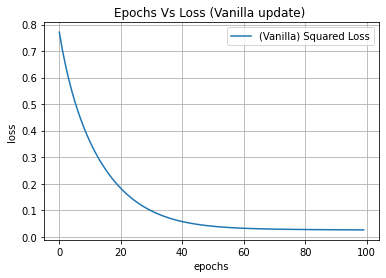

In [ ]:
plt.plot( np.array([i for i in range(epochs)]), np.array(epoch_loss), label="(Vanilla) Squared Loss" )
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Epochs Vs Loss (Vanilla update) ")
plt.grid()
plt.show()

In [ ]:
W = np.ones(9)*0.1
dw_arr = np.zeros(9)
learning_rate = 0.0001
momentum_rate = 0.9
epochs_m = 100
epoch_loss_m = []

for e in range(0, epochs_m ):
  loss_of_each_point = []
  for i in range(len(X)):
      d2 = forward_propagation(X[i] , y[i] , W )
      loss_of_each_point.append( d2['loss'] )
      dw_back = backward_propagation(X[i] , W , d2 )

      dw_prev = np.array( dw_arr )
      
      dw_arr[0] = dw_back['dw1']
      dw_arr[1] = dw_back['dw2']
      dw_arr[2] = dw_back['dw3']
      dw_arr[3] = dw_back['dw4']
      dw_arr[4] = dw_back['dw5']
      dw_arr[5] = dw_back['dw6']
      dw_arr[6] = dw_back['dw7']
      dw_arr[7] = dw_back['dw8']
      dw_arr[8] = dw_back['dw9']

      #W = W - ( learning_rate * dw_arr )
      v = ( learning_rate * dw_arr ) + ( momentum_rate * dw_prev )
      W = W - v
  
  avg_loss = np.mean( loss_of_each_point )
  epoch_loss_m.append( avg_loss )

W , avg_loss

(array([ 0.39156467,  0.13241529, -0.097797  , -0.44921275,  0.56506333,
         1.4305424 ,  1.16624476, -0.48958829,  1.49052144]),
 0.015946901110766812)

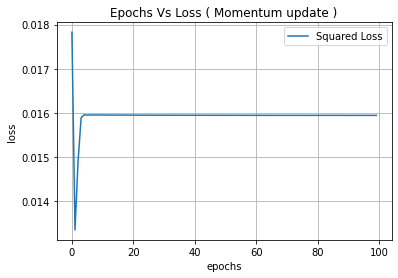

In [ ]:
plt.plot( np.array([i for i in range(epochs_m)]), np.array(epoch_loss_m), label="Squared Loss" )
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Epochs Vs Loss ( Momentum update of weights)")
plt.grid()
plt.show()

In [ ]:
W = np.ones(9)*0.1
dw_arr = np.zeros(9)
learning_rate = 0.0001
epsilon_adam = 10**(-8)

epochs_adam = 100
epoch_loss_adam = []

m_prev = np.zeros(9)
v_prev = np.zeros(9)
Beta1 = 0.9
Beta2 = 0.999

for e in range(0, epochs_adam ):
  loss_of_each_point = []
  for i in range(len(X)):
      d2 = forward_propagation(X[i] , y[i] , W )
      loss_of_each_point.append( d2['loss'] )
      dw_back = backward_propagation(X[i] , W , d2 )

      dw_arr[0] = dw_back['dw1']
      dw_arr[1] = dw_back['dw2']
      dw_arr[2] = dw_back['dw3']
      dw_arr[3] = dw_back['dw4']
      dw_arr[4] = dw_back['dw5']
      dw_arr[5] = dw_back['dw6']
      dw_arr[6] = dw_back['dw7']
      dw_arr[7] = dw_back['dw8']
      dw_arr[8] = dw_back['dw9']

      #W = W - ( learning_rate * dw_arr )
      #v = ( learning_rate * dw_arr ) + ( momentum * dw_prev )
      #W = W - v
      m = ( Beta1 * m_prev ) + ( (1-Beta1 ) * dw_arr )
      m_prev = m
      v = ( Beta2 * v_prev ) + ((1-Beta2) * np.square( dw_arr ))
      v_prev = v
      m_hat = m / ( 1- (Beta1**(i+1)))
      v_hat = v / ( 1- (Beta2**(i+1)))

      W = W - ( learning_rate * (m_hat / ( np.sqrt(v_hat) + epsilon_adam) ) )
  
  avg_loss = np.mean( loss_of_each_point )
  epoch_loss_adam.append( avg_loss )

W , avg_loss

(array([0.67060786, 0.58676578, 0.97667923, 0.95463654, 0.90107234,
        0.9021703 , 0.84673644, 0.90595431, 1.01726725]),
 4.7562618865141096e-05)

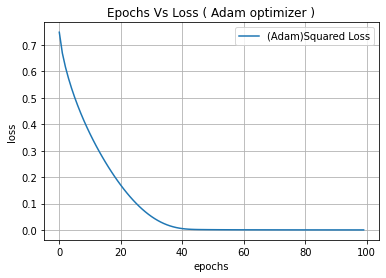

In [ ]:
plt.plot( np.array([i for i in range(epochs_adam)]), np.array(epoch_loss_adam ), label="(Adam)Squared Loss" )
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Epochs Vs Loss ( Adam optimizer )")
plt.grid()
plt.show()

In [ ]:
#epsilon_adam = 1.0e-08
#np.power(10,8)
10**(-8)

1e-08

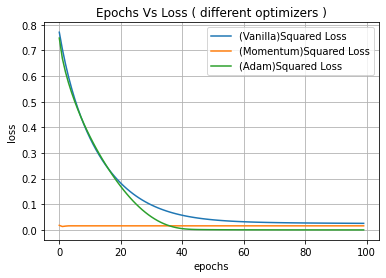

In [ ]:
plt.plot( np.array([i for i in range(epochs)]), np.array(epoch_loss), label="(Vanilla)Squared Loss" )

plt.plot( np.array([i for i in range(epochs_m)]), np.array(epoch_loss_m ), label="(Momentum)Squared Loss" )

plt.plot( np.array([i for i in range(epochs_adam)]), np.array(epoch_loss_adam ), label="(Adam)Squared Loss" )

plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Epochs Vs Loss ( different optimizers )")
plt.grid()
plt.show()